# Modelo No Supervisado - Cluster Analysis

**Fecha**: 0623

**Objetivo**:

El objetivo de un modelo de análisis de clusters en una base de datos de vinos es identificar grupos o clusters de vinos similares con características comunes.

Esto ayuda a entender la estructura y clasificación de los vinos, permitiendo segmentarlos en grupos homogéneos.

El análisis de clusters sirve para descubrir patrones ocultos, identificar diferentes estilos de vinos y apoyar en la toma de decisiones en la industria vitivinícola, como la segmentación de mercado y recomendaciones personalizadas.qwdqwdq

In [1]:
# Procesamiento de datos
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Reduction
from sklearn.decomposition import PCA

# Modelos
from sklearn.cluster import KMeans


## **Paso #1**: Carga y procesamiento de bases (compartir archivos)

In [2]:
!ls

sample_data  Supervised_Classification_23.ipynb  wine-clustering.csv


In [3]:
# Load your dataset or use any database you find online
df = pd.read_csv('wine-clustering.csv')
df.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [4]:
# ¿Hay nulos?, ¿Qué tipo de datos tiene cada columna?
print("Forma de la base: ", df.shape)
df.info()

Forma de la base:  (178, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
# Estadísticos por columna
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## **Paso #2**: Exploración de Datos

In [6]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

**Variables Numéricas**

In [7]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

<Axes: >

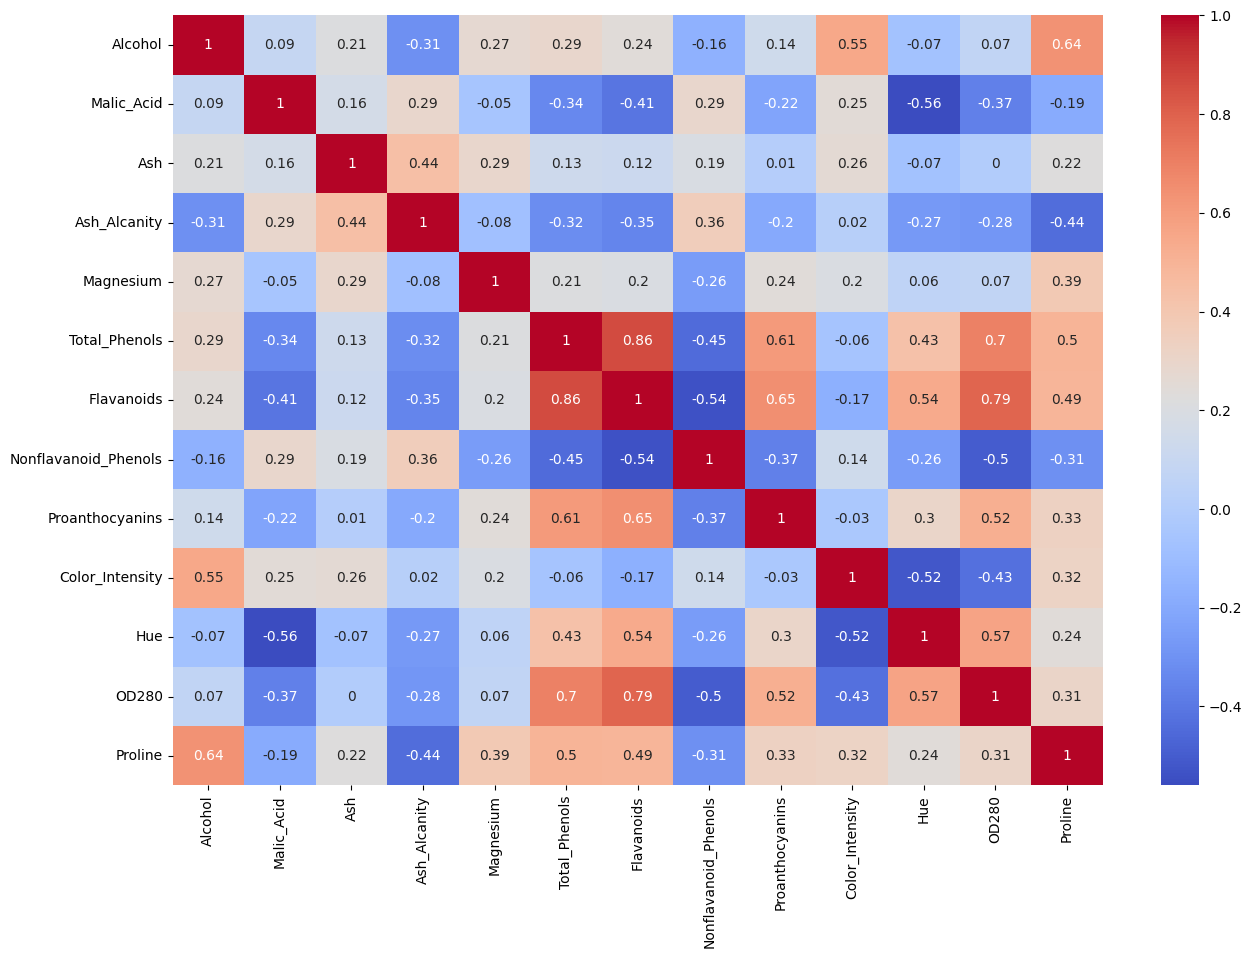

In [8]:
# Es preferible no contar con variables explicativas que tengan alta correlación entre sí
corr = df[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
           'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
           'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']].corr().round(2)

plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

**StandardScaler**

In [9]:
# Estandarización
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


**Feature Reduction**

Text(0, 0.5, 'PC2')

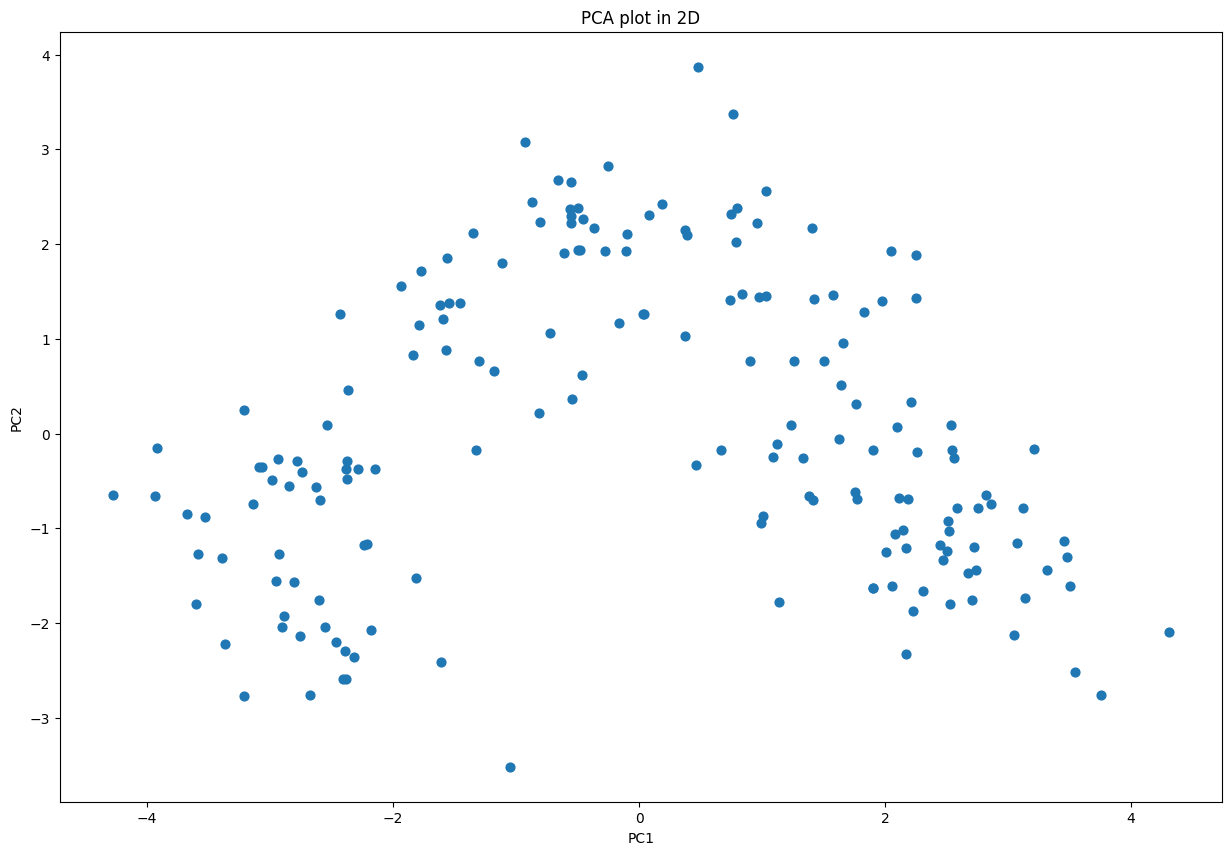

In [10]:
# Figure size
plt.figure(figsize=(15,10))

# Creando el objeto de "Principal Component Analysis"
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

principal_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [11]:
# Valores de las dos variables creadas
print(principal_df.shape)
principal_df.head()

(178, 2)


,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

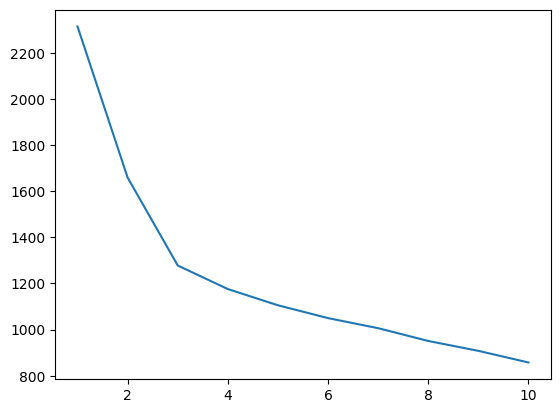

In [12]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.show()

Text(0, 0.5, 'PC2')

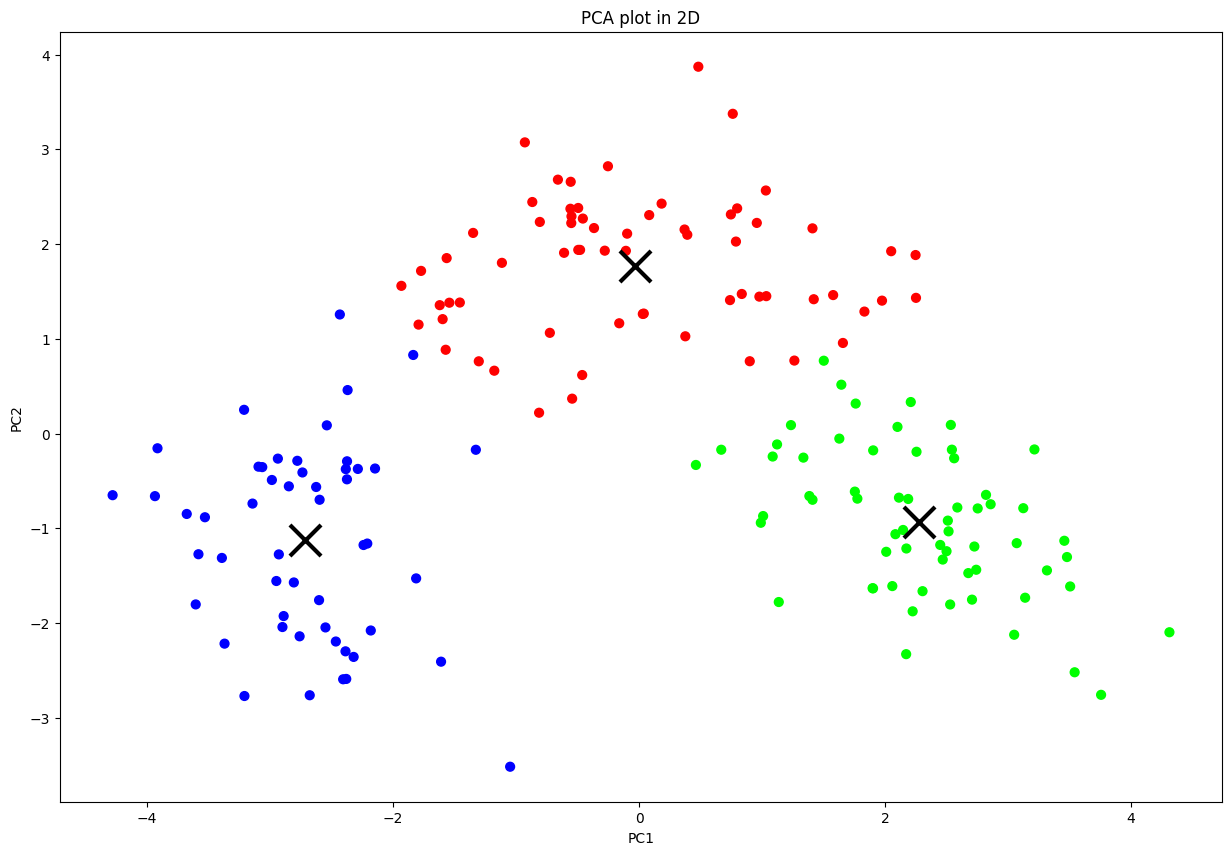

In [13]:
# Creando el objeto KMeans
kmeans = KMeans(n_clusters=3, n_init=15, max_iter=500, random_state=0)

# Entrenar y hacer predicciones
clusters = kmeans.fit_predict(df_scaled)

# Centroides de los Clusters
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

# Plotting del PCA
plt.figure(figsize=(15,10))

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=3, color="black")

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [14]:
# Predicciones
df['clusters'] = clusters
df['clusters'].value_counts()

1    65
2    62
0    51
Name: clusters, dtype: int64